In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from src.utils import get_kfold_data, print_statistics, plot_distribution, convert_non_numeric_to_numeric, is_outlier
from src.constants import *

Load data

In [2]:
data = pd.read_csv(DATA_PATH)

In [3]:
data.head()

,outcome,carat,cut,color,clarity,depth,table,price,x,y,...,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10
0,-26.701232,1.14,Ideal,G,VS1,62.3,56.0,7948,6.73,6.70,...,0.168836,-0.273758,1.107832,1.247795,0.482344,0.489511,-0.321138,0.573382,0.446871,-1.990581
1,6.548093,0.38,Premium,H,VS2,60.5,59.0,898,4.69,4.66,...,-0.256549,0.315373,-0.030326,-0.114335,-1.059588,-1.761360,-1.343951,-1.002550,-0.225030,-0.446653
2,6.612562,0.50,Very Good,E,SI1,60.7,58.0,1351,5.09,5.13,...,-1.193327,-0.657307,-0.591726,-0.446856,-0.765286,-0.816544,-1.397794,-0.477130,0.810509,1.725131
3,-5.073562,0.70,Premium,D,SI1,61.2,58.0,2512,5.74,5.70,...,-1.740788,-1.778860,-0.825070,0.444932,1.173109,0.453606,-0.263440,0.246210,-0.850503,-0.412950
4,-14.436557,0.83,Ideal,G,SI2,62.4,54.0,2751,6.01,6.08,...,-0.859322,1.409268,0.861992,1.109063,-1.436722,-1.461618,0.081787,0.258087,0.851146,2.204813


In [4]:
data.shape

(10000, 31)

In [5]:
data.columns

Index(['outcome', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3',
       'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9',
       'b10'],
      dtype='object')

In [6]:
# Find columns
all_columns = data.columns.tolist()
print(all_columns)

numeric_columns = data.select_dtypes(include=["number"]).columns.tolist()
numeric_columns.remove("outcome") # Remove the target column
print(numeric_columns)

non_numeric_columns = data.select_dtypes(exclude=["number"]).columns.tolist()
print(non_numeric_columns)

print(f"Num of numeric columns: {len(numeric_columns)}")
print(f"Num of non-numeric columns: {len(non_numeric_columns)}")
print(f"Num of all columns: {len(all_columns)}")

['outcome', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']
['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']
['cut', 'color', 'clarity']
Num of numeric columns: 27
Num of non-numeric columns: 3
Num of all columns: 31


In [7]:
print(data["cut"].value_counts())

cut
Ideal        4040
Premium      2439
Very Good    2296
Good          925
Fair          300
Name: count, dtype: int64


In [8]:
print(data["clarity"].value_counts())

clarity
SI1     2408
VS2     2256
SI2     1743
VS1     1503
VVS2     951
VVS1     675
IF       318
I1       146
Name: count, dtype: int64


In [9]:
print(data["color"].value_counts())

color
G    2120
E    1873
F    1746
H    1506
D    1246
I     983
J     526
Name: count, dtype: int64


Checking for missing values

In [10]:
for column in all_columns:
    num_nan = data[column].isna().sum()
    num_none = data[column].isnull().sum()
    print(f"{column} | Number of NaN: {num_nan} | Number of None: {num_none}")

outcome | Number of NaN: 0 | Number of None: 0
carat | Number of NaN: 0 | Number of None: 0
cut | Number of NaN: 0 | Number of None: 0
color | Number of NaN: 0 | Number of None: 0
clarity | Number of NaN: 0 | Number of None: 0
depth | Number of NaN: 0 | Number of None: 0
table | Number of NaN: 0 | Number of None: 0
price | Number of NaN: 0 | Number of None: 0
x | Number of NaN: 0 | Number of None: 0
y | Number of NaN: 0 | Number of None: 0
z | Number of NaN: 0 | Number of None: 0
a1 | Number of NaN: 0 | Number of None: 0
a2 | Number of NaN: 0 | Number of None: 0
a3 | Number of NaN: 0 | Number of None: 0
a4 | Number of NaN: 0 | Number of None: 0
a5 | Number of NaN: 0 | Number of None: 0
b1 | Number of NaN: 0 | Number of None: 0
b2 | Number of NaN: 0 | Number of None: 0
b3 | Number of NaN: 0 | Number of None: 0
b4 | Number of NaN: 0 | Number of None: 0
b5 | Number of NaN: 0 | Number of None: 0
a6 | Number of NaN: 0 | Number of None: 0
a7 | Number of NaN: 0 | Number of None: 0
a8 | Number

Data statistics

In [11]:
# for column in numeric_columns:
#     print_statistics(data[column], column)

In [12]:
# Find columns
all_columns = data.columns.tolist()
print(all_columns)

numeric_columns = data.select_dtypes(include=["number"]).columns.tolist()
numeric_columns.remove("outcome") # Remove the target column
print(numeric_columns)

non_numeric_columns = data.select_dtypes(exclude=["number"]).columns.tolist()
print(non_numeric_columns)


['outcome', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']
['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']
['cut', 'color', 'clarity']


Removing outliers

In [13]:
print(numeric_columns)
mean_per_column = {col: data[col].mean() for col in numeric_columns}
std_per_column = {col: data[col].std() for col in numeric_columns}


['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10']


In [14]:
print(f"Before removing outliers: {data.shape}")
data = data[~data.apply(is_outlier, axis=1, numeric_columns=numeric_columns, mean_per_column=mean_per_column, std_per_column=std_per_column)]
print(f"After removing outliers: {data.shape}")

Before removing outliers: (10000, 31)
After removing outliers: (9291, 31)


Plotting correlation matrix

In [15]:
data = convert_non_numeric_to_numeric(data=data)
print(data)

['G', 'E', 'F', 'H', 'D', 'I', 'J']
        outcome  carat  cut  clarity  depth  table  price     x     y     z  \
0    -26.701232   1.14    0        3   62.3   56.0   7948  6.73  6.70  4.18   
1      6.548093   0.38    1        4   60.5   59.0    898  4.69  4.66  2.83   
2      6.612562   0.50    2        5   60.7   58.0   1351  5.09  5.13  3.10   
3     -5.073562   0.70    1        5   61.2   58.0   2512  5.74  5.70  3.50   
4    -14.436557   0.83    0        6   62.4   54.0   2751  6.01  6.08  3.77   
...         ...    ...  ...      ...    ...    ...    ...   ...   ...   ...   
9994  14.026668   0.38    0        5   61.4   57.0    653  4.64  4.67  2.86   
9995  10.718277   0.33    0        3   62.6   57.0   1002  4.42  4.40  2.76   
9997  11.122516   0.52    2        6   57.9   61.0   1273  5.28  5.33  3.07   
9998 -24.730782   0.31    0        0   62.0   54.0    801  4.35  4.39  2.71   
9999   8.735755   0.37    2        5   59.9   59.0    649  4.68  4.70  2.81   

      ...      

In [16]:
def plot_correlation_matrix(data:pd.DataFrame):
    corr = data.corr()
    plt.figure(figsize=(40, 40))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, center=0)
    plt.title("Correlation Matrix")
    plt.show()

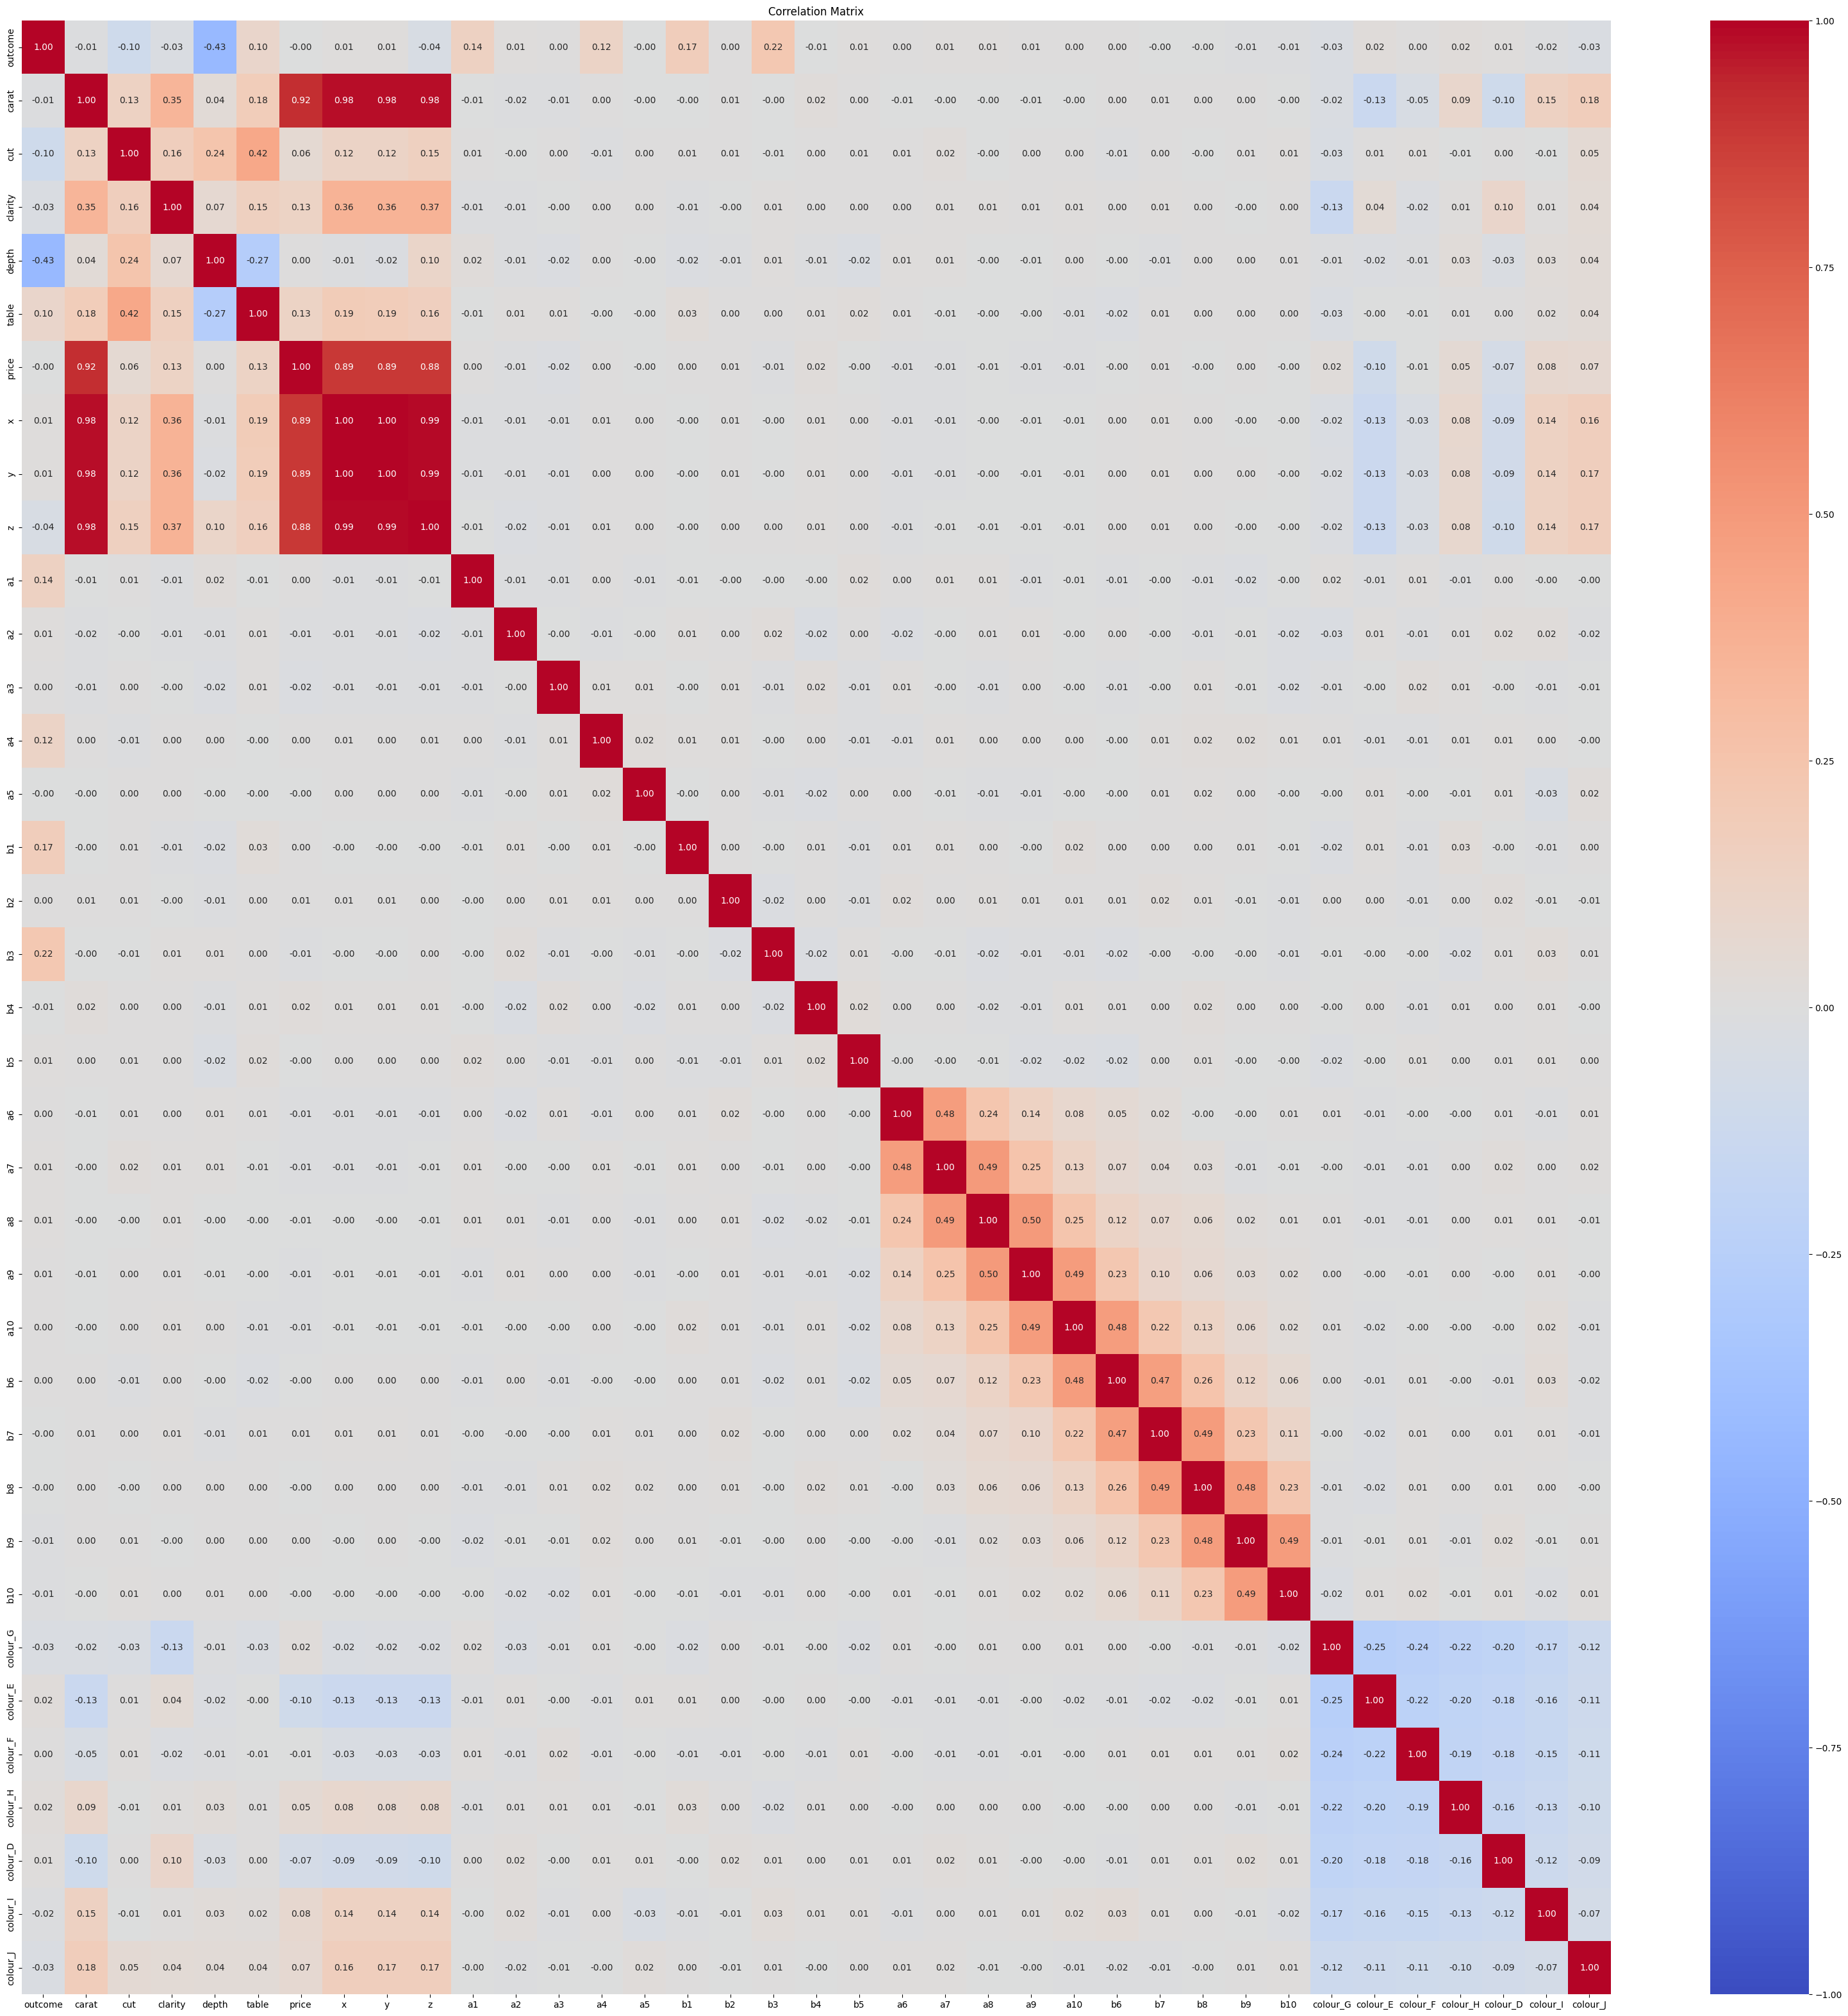

In [17]:
plot_correlation_matrix(data)

Data visualisation

In [18]:
# for column in numeric_columns:
#     plot_distribution(data[column], column, f"Distribution of {column}")

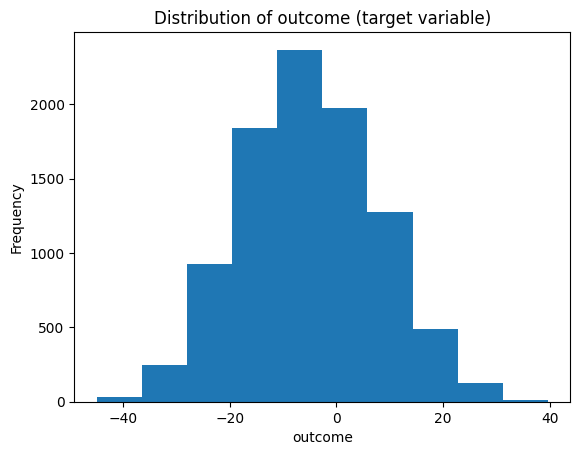

In [19]:
plot_distribution(data["outcome"], "outcome", "Distribution of outcome (target variable)")

Data splitting:
- Split the entire dataset into training and testing sets first.
- Use the training set to generate folds (one validation and the rest training folds) (K-Fold Cross Validation)

In [20]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=REPRODUCIBILITY_SEED)
print(f"Training set size: {len(train_data)} | Test set size: {len(test_data)}")    
print()

kfold_data = get_kfold_data(data=train_data, k=NUM_FOLDS, reproducibility_seed=REPRODUCIBILITY_SEED)

Training set size: 7432 | Test set size: 1859

Fold: 0/5
Train shape: (5945, 37) | 79.99%
Validation shape: (1487, 37) | 20.01%
Index(['outcome', 'carat', 'cut', 'clarity', 'depth', 'table', 'price', 'x',
       'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5',
       'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10',
       'colour_G', 'colour_E', 'colour_F', 'colour_H', 'colour_D', 'colour_I',
       'colour_J'],
      dtype='object')
Index(['outcome', 'carat', 'cut', 'clarity', 'depth', 'table', 'price', 'x',
       'y', 'z', 'a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5',
       'a6', 'a7', 'a8', 'a9', 'a10', 'b6', 'b7', 'b8', 'b9', 'b10',
       'colour_G', 'colour_E', 'colour_F', 'colour_H', 'colour_D', 'colour_I',
       'colour_J'],
      dtype='object')

Fold: 1/5
Train shape: (5945, 37) | 79.99%
Validation shape: (1487, 37) | 20.01%
Index(['outcome', 'carat', 'cut', 'clarity', 'depth', 'table', 'price', 'x',
       'y', 'z', 'a1', 'a

Data normalisation (using mean, std standardisation)

Before standardization:


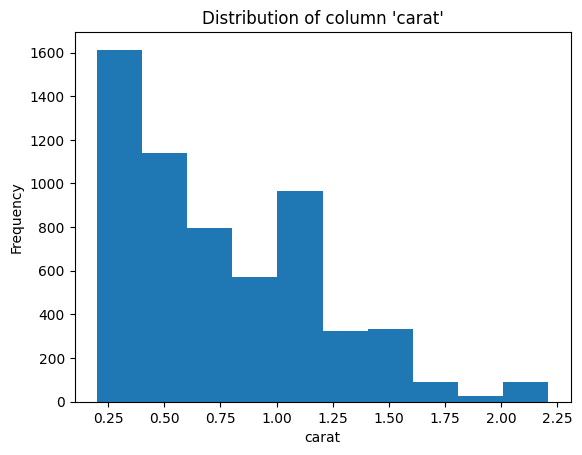

Statistics for column: carat
Mean: 0.7606745164003365
Median: 0.7
Standard Deviation: 0.4202648485565263
Minimum Value: 0.2
Maximum Value: 2.21

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


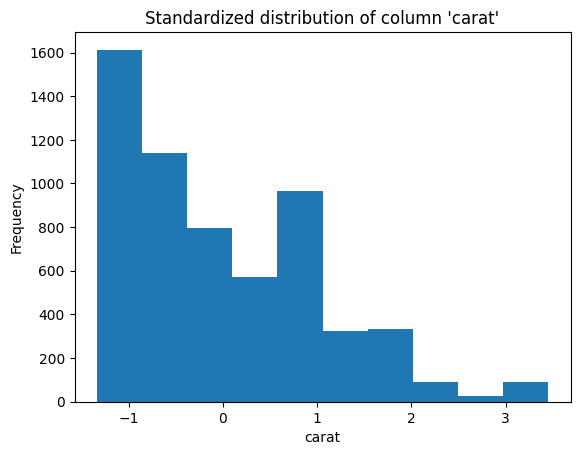

Statistics for column: carat
Mean: -9.262752232364636e-17
Median: -0.1443720909921753
Standard Deviation: 0.9999999762054815
Minimum Value: -1.3340980217239
Maximum Value: 3.4486002198176338

Before standardization:


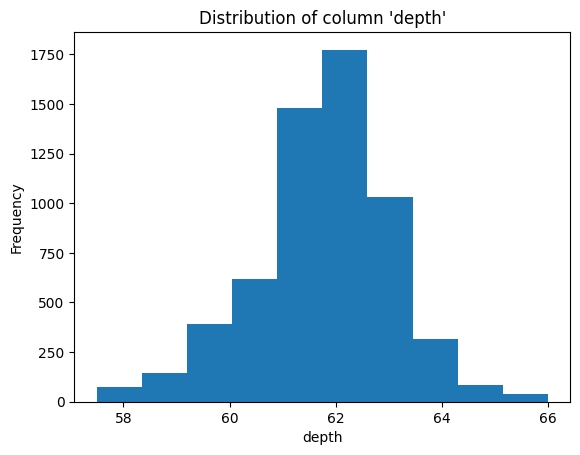

Statistics for column: depth
Mean: 61.75007569386039
Median: 61.9
Standard Deviation: 1.2792501316724094
Minimum Value: 57.5
Maximum Value: 66.0

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


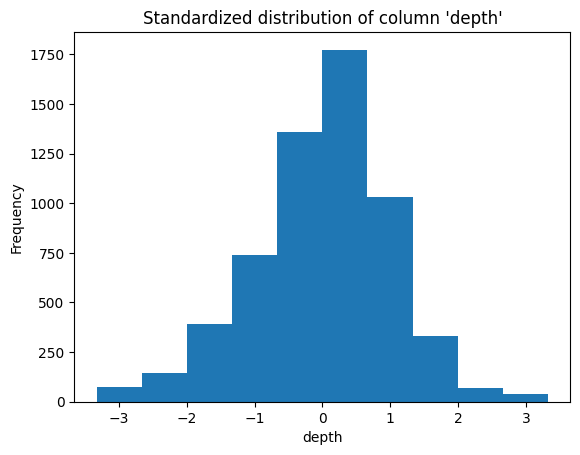

Statistics for column: depth
Mean: -1.369692136553532e-15
Median: 0.11719702132970543
Standard Deviation: 0.9999999921829206
Minimum Value: -3.3223179387763153
Maximum Value: 3.322199597792136

Before standardization:


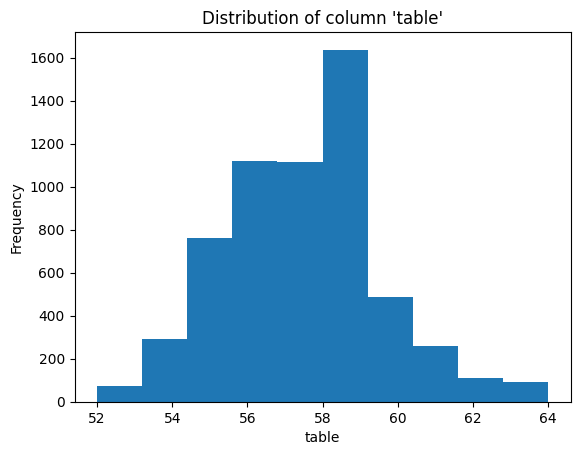

Statistics for column: table
Mean: 57.36583683767873
Median: 57.0
Standard Deviation: 2.0887658339089152
Minimum Value: 52.0
Maximum Value: 64.0

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


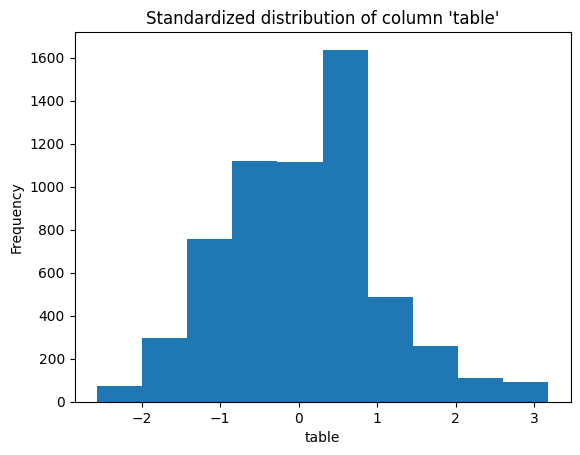

Statistics for column: table
Mean: -3.0268283907694764e-15
Median: -0.17514497316468042
Standard Deviation: 0.999999995212484
Minimum Value: -2.5689029975888076
Maximum Value: 3.176116261029098

Before standardization:


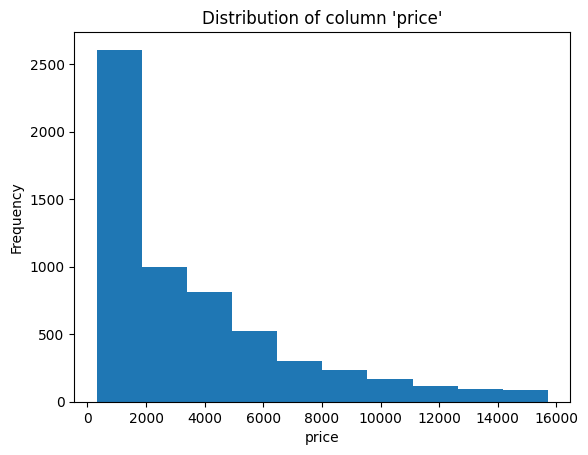

Statistics for column: price
Mean: 3583.173927670311
Median: 2344.0
Standard Deviation: 3393.6155279645022
Minimum Value: 326
Maximum Value: 15708

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


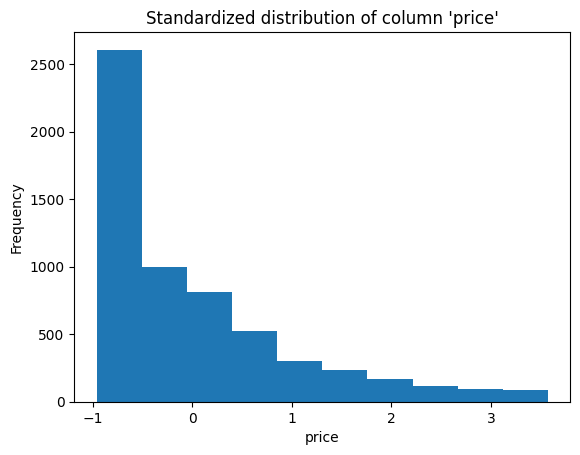

Statistics for column: price
Mean: 2.9879845910853667e-17
Median: -0.36514859077448847
Standard Deviation: 0.9999999999970532
Minimum Value: -0.9597946204632005
Maximum Value: 3.5728343332889145

Before standardization:


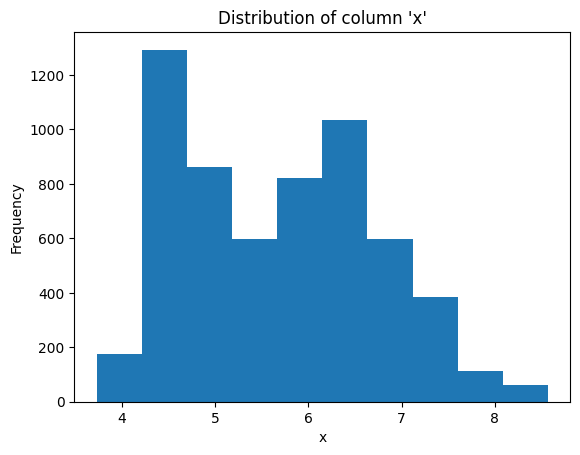

C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


Statistics for column: x
Mean: 5.662984020185029
Median: 5.68
Standard Deviation: 1.048519935477879
Minimum Value: 3.73
Maximum Value: 8.57

After standardization:


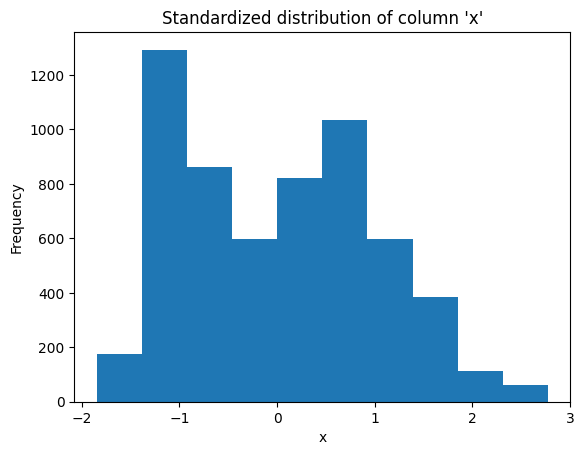

Statistics for column: x
Mean: -7.768759936821954e-18
Median: 0.016228570461017774
Standard Deviation: 0.999999990462747
Minimum Value: -1.8435357653630926
Maximum Value: 2.7724946886823925

Before standardization:


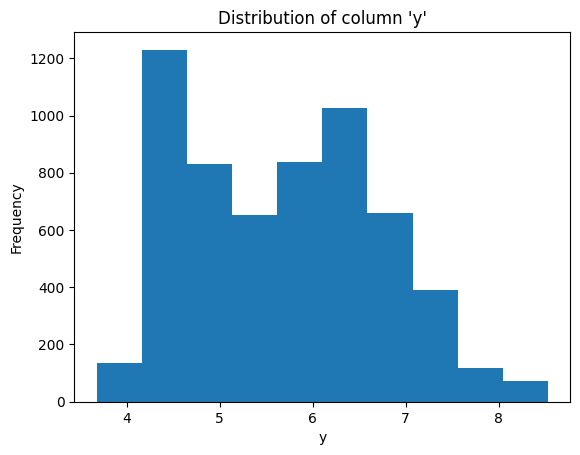

Statistics for column: y
Mean: 5.666723296888141
Median: 5.69
Standard Deviation: 1.0419801370273423
Minimum Value: 3.68
Maximum Value: 8.53

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


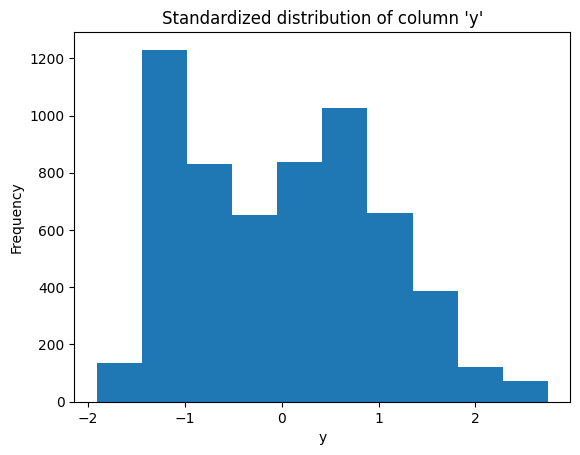

Statistics for column: y
Mean: 3.66924507785283e-16
Median: 0.022338912289514744
Standard Deviation: 0.9999999904028882
Minimum Value: -1.9066805663774398
Maximum Value: 2.747918673192076

Before standardization:


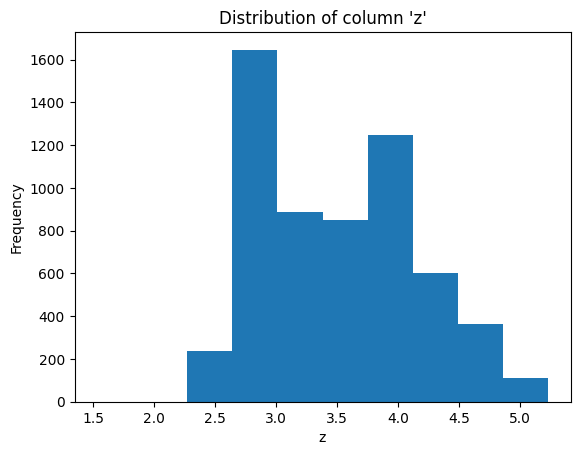

Statistics for column: z
Mean: 3.4978233809924304
Median: 3.51
Standard Deviation: 0.6491569015251908
Minimum Value: 1.53
Maximum Value: 5.23

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


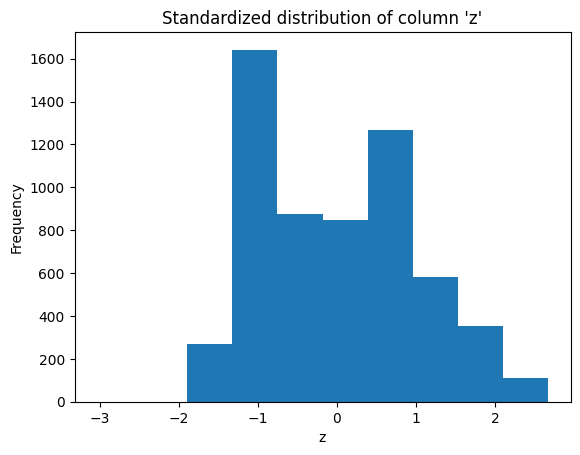

Statistics for column: z
Mean: 3.4122784030194886e-16
Median: 0.01875758971580613
Standard Deviation: 0.999999984595404
Minimum Value: -3.031352429675345
Maximum Value: 2.668348111611151

Before standardization:


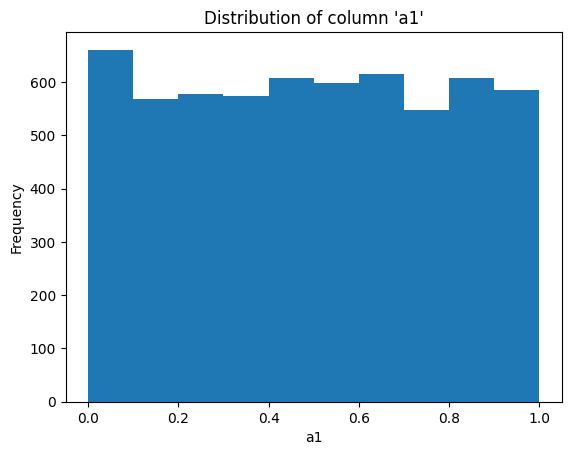

Statistics for column: a1
Mean: 0.496315674791606
Median: 0.496691883308813
Standard Deviation: 0.29066253708268086
Minimum Value: 0.0001277322880923
Maximum Value: 0.999789143214002

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


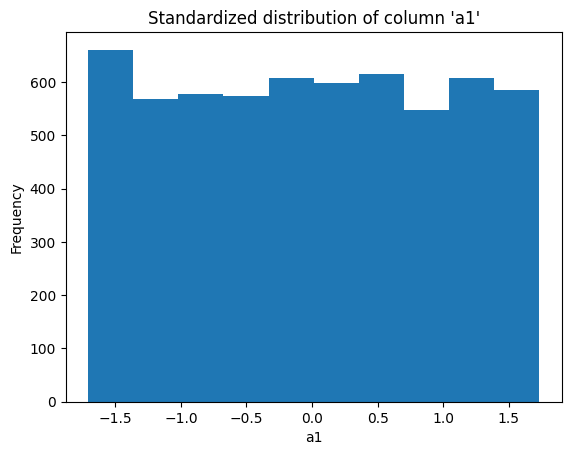

Statistics for column: a1
Mean: 2.0437814603023907e-16
Median: 0.001294313701517153
Standard Deviation: 0.9999999655958427
Minimum Value: -1.7070928039530657
Maximum Value: 1.7321580419481417

Before standardization:


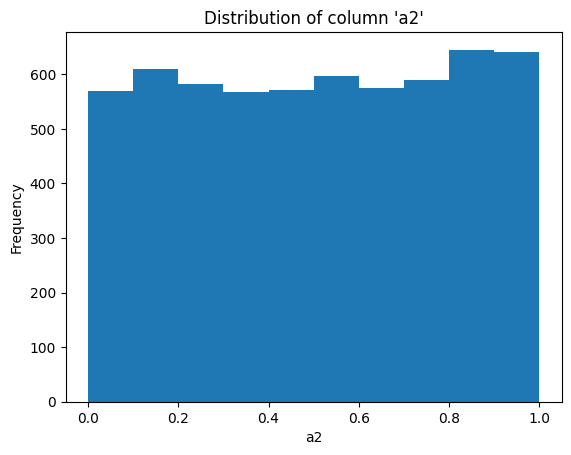

Statistics for column: a2
Mean: 0.508437828828218
Median: 0.512291149701923
Standard Deviation: 0.2919586152334858
Minimum Value: 0.0001012263819575
Maximum Value: 0.999976135091856

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


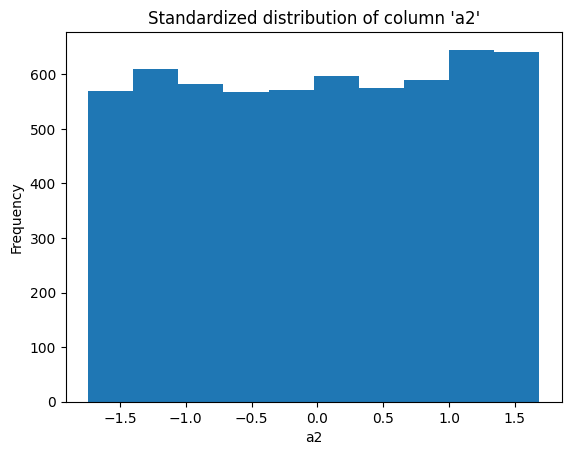

Statistics for column: a2
Mean: 2.414291549596976e-16
Median: 0.013198174469493612
Standard Deviation: 0.9999999657485715
Minimum Value: -1.741125483241786
Maximum Value: 1.6835889190481834

Before standardization:


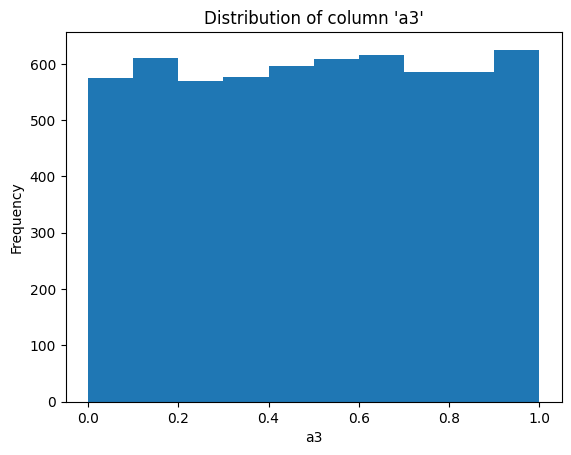

Statistics for column: a3
Mean: 0.5048319456886964
Median: 0.50853174761869
Standard Deviation: 0.2887914678864954
Minimum Value: 0.0001761061139404
Maximum Value: 0.999900044407696

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


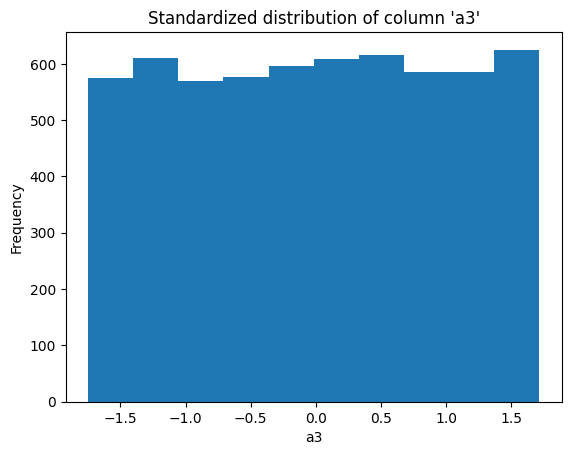

Statistics for column: a3
Mean: 1.0876263911550735e-16
Median: 0.012811326556692178
Standard Deviation: 0.9999999653729396
Minimum Value: -1.7474748329419278
Maximum Value: 1.7142753045973806

Before standardization:


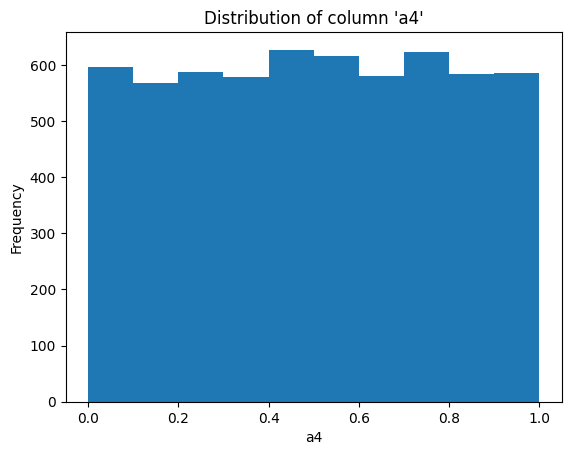

Statistics for column: a4
Mean: 0.5008937868620195
Median: 0.50254373322241
Standard Deviation: 0.28736629763658234
Minimum Value: 0.0001009085681289
Maximum Value: 0.999136772472411

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


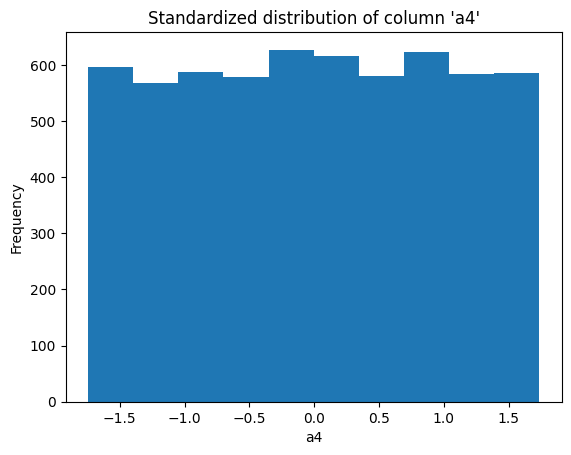

Statistics for column: a4
Mean: 9.143232848721222e-17
Median: 0.005741613809775892
Standard Deviation: 0.9999999652012093
Minimum Value: -1.7426986566818334
Maximum Value: 1.7338253384961686

Before standardization:


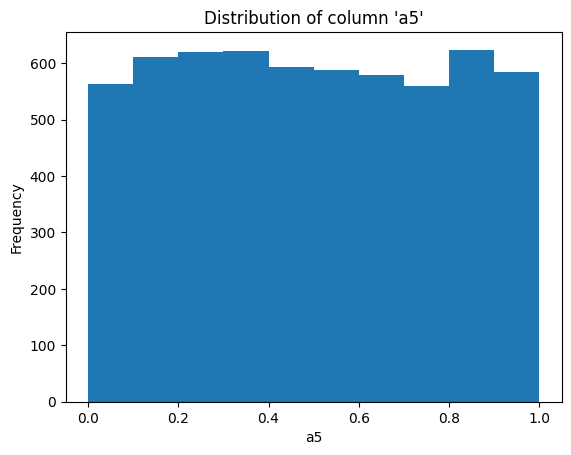

Statistics for column: a5
Mean: 0.4982903066268261
Median: 0.494348442880437
Standard Deviation: 0.28807032686149997
Minimum Value: 0.0001657167449593
Maximum Value: 0.999856107169762

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


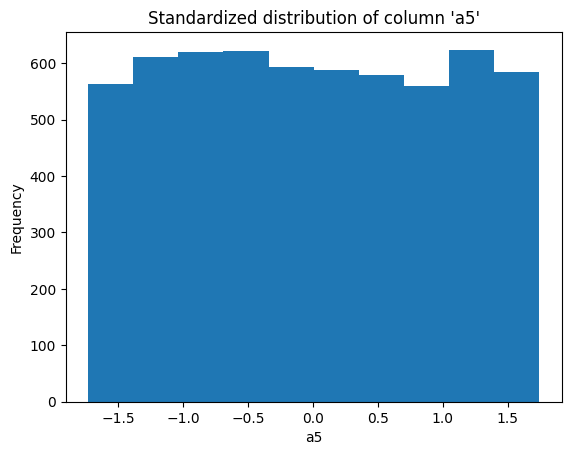

Statistics for column: a5
Mean: 1.840598508108586e-16
Median: -0.013683684996294144
Standard Deviation: 0.9999999652862558
Minimum Value: -1.7291769618103994
Maximum Value: 1.7411226924904855

Before standardization:


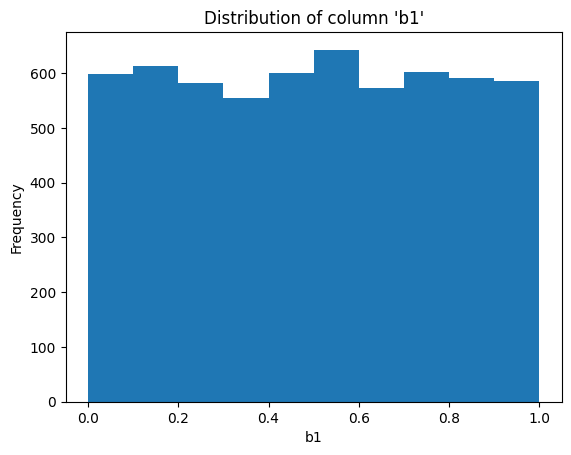

Statistics for column: b1
Mean: 0.499445906438206
Median: 0.504446203121916
Standard Deviation: 0.2883798998650607
Minimum Value: 0.0002307298127561
Maximum Value: 0.999704224057496

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


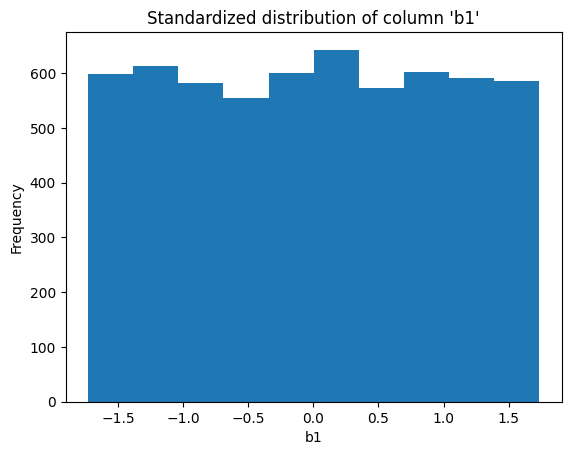

Statistics for column: b1
Mean: 1.0876263911550735e-16
Median: 0.01733926848805016
Standard Deviation: 0.9999999653235208
Minimum Value: -1.7311024781824909
Maximum Value: 1.7347197238995322

Before standardization:


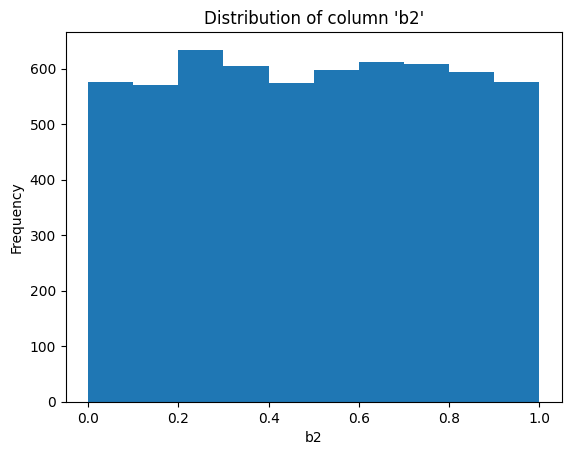

Statistics for column: b2
Mean: 0.5001737518820761
Median: 0.501675551757217
Standard Deviation: 0.28700144268786537
Minimum Value: 4.75924462080002e-05
Maximum Value: 0.999744498403743

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


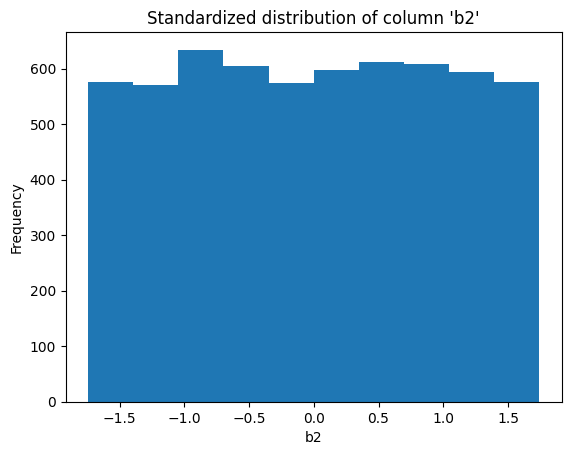

Statistics for column: b2
Mean: 6.633325792209514e-17
Median: 0.005232725692068846
Standard Deviation: 0.9999999651569709
Minimum Value: -1.742591038310148
Maximum Value: 1.7406558114707031

Before standardization:


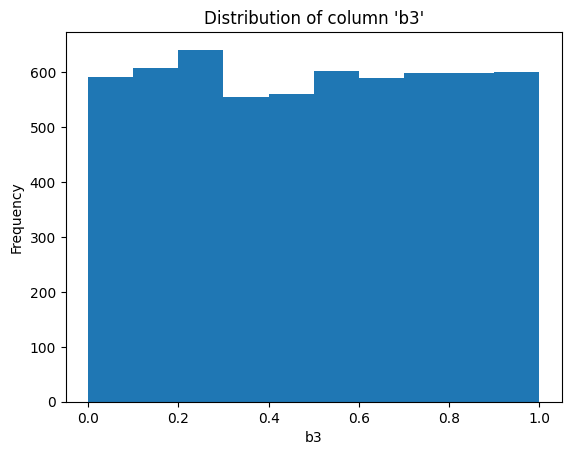

Statistics for column: b3
Mean: 0.499139517350232
Median: 0.503029013751075
Standard Deviation: 0.29040624381046676
Minimum Value: 4.47132624685764e-05
Maximum Value: 0.999858734197915

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


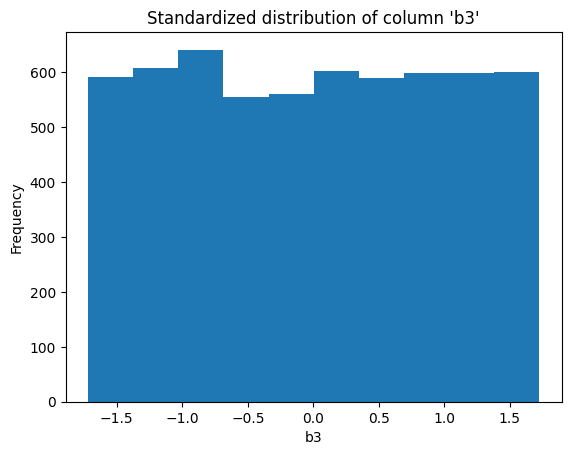

Statistics for column: b3
Mean: 1.1712899597054637e-16
Median: 0.013393294220796954
Standard Deviation: 0.9999999655654799
Minimum Value: -1.7186090090659583
Maximum Value: 1.7242025964581216

Before standardization:


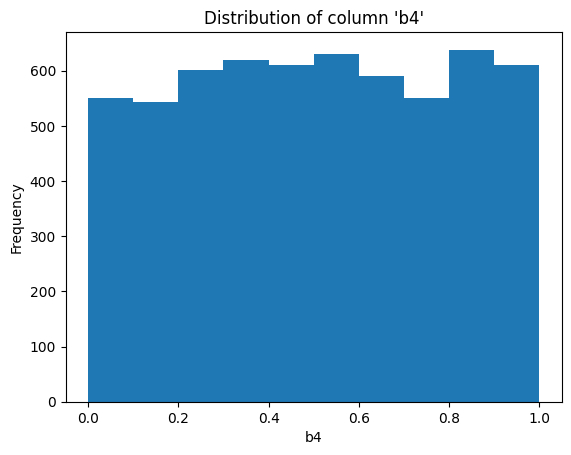

Statistics for column: b4
Mean: 0.5072863863752897
Median: 0.507333057699725
Standard Deviation: 0.2862122872621037
Minimum Value: 3.2366719096899e-05
Maximum Value: 0.999843736179173

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


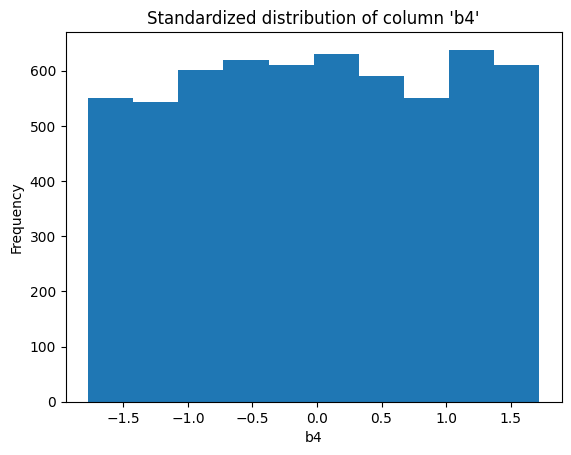

Statistics for column: b4
Mean: 8.366356855039026e-18
Median: 0.00016306540593056891
Standard Deviation: 0.9999999650609003
Minimum Value: -1.7722998784768023
Maximum Value: 1.7209510370996244

Before standardization:


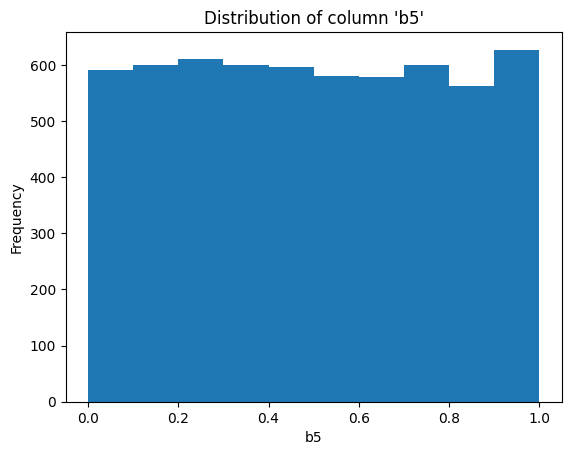

Statistics for column: b5
Mean: 0.49965189598697335
Median: 0.494619448203594
Standard Deviation: 0.28962490134222146
Minimum Value: 0.0001021134667098
Maximum Value: 0.999867933103815

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


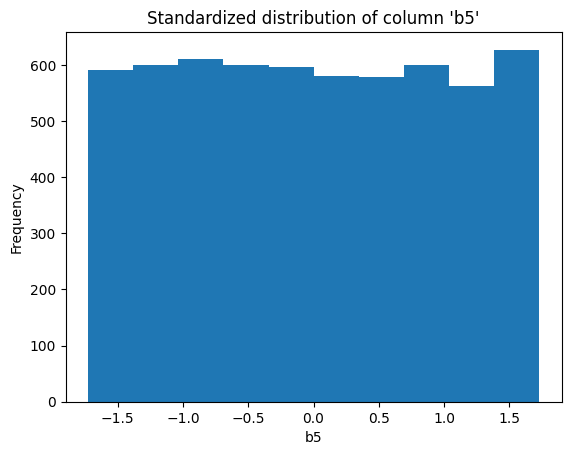

Statistics for column: b5
Mean: 1.434232603720976e-17
Median: -0.017375742162707146
Standard Deviation: 0.9999999654725833
Minimum Value: -1.724816350241345
Maximum Value: 1.7271167552496383

Before standardization:


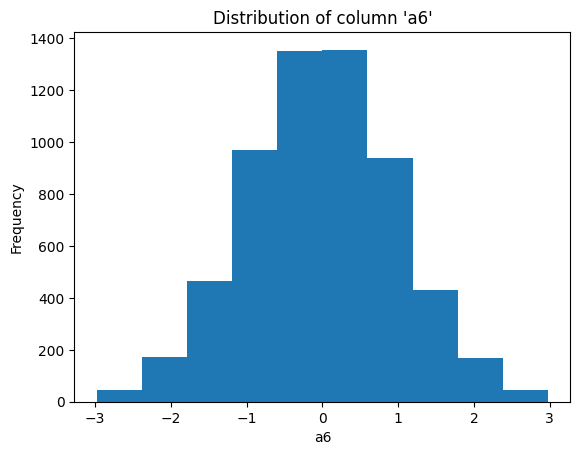

Statistics for column: a6
Mean: -0.012331163633650435
Median: -0.0104110972579791
Standard Deviation: 0.9836782714671592
Minimum Value: -2.97331799906314
Maximum Value: 2.97449513774209

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


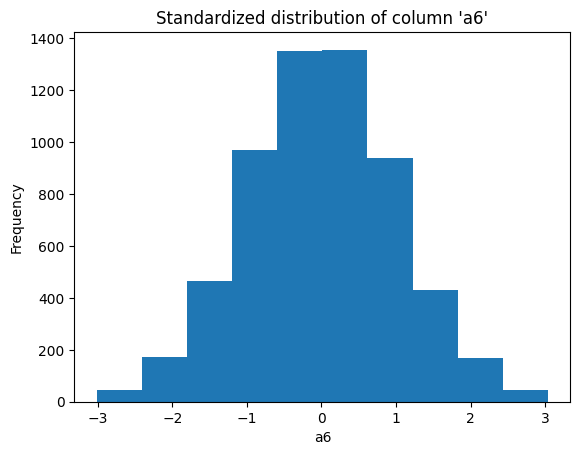

Statistics for column: a6
Mean: 2.3903876728682932e-18
Median: 0.0019519251485430283
Standard Deviation: 0.9999999898340746
Minimum Value: -3.0101171198099124
Maximum Value: 3.0363853280575426

Before standardization:


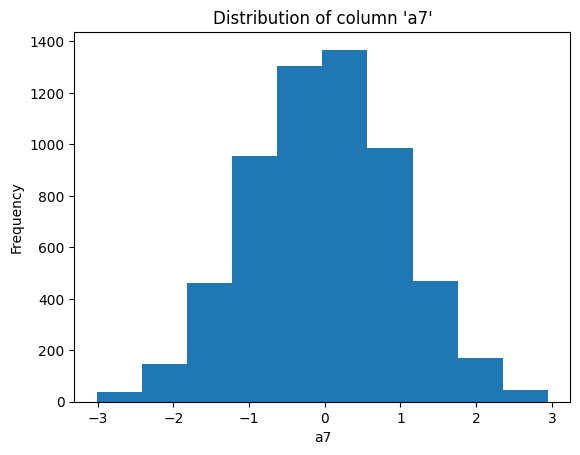

Statistics for column: a7
Mean: -0.008204018985738689
Median: 0.0001895157510566
Standard Deviation: 0.9736293975441352
Minimum Value: -3.0094509342062
Maximum Value: 2.94757858953292

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


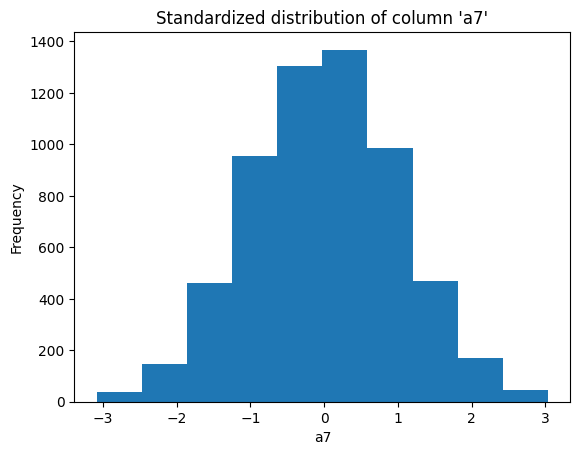

Statistics for column: a7
Mean: -2.3903876728682932e-17
Median: 0.008620872245392612
Standard Deviation: 0.9999999897291515
Minimum Value: -3.082535194567254
Maximum Value: 3.035839494591962

Before standardization:


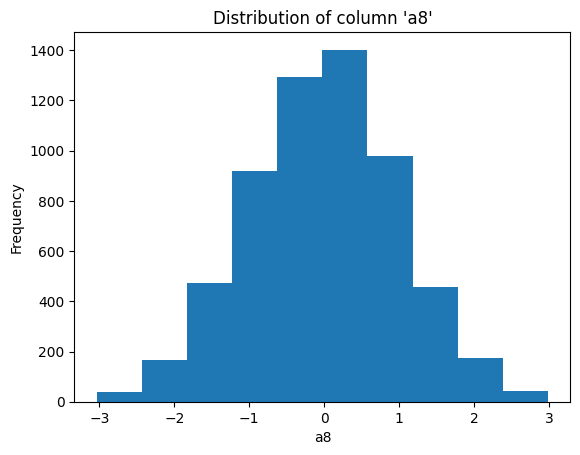

Statistics for column: a8
Mean: -0.009904322577429236
Median: 0.0101260629861696
Standard Deviation: 0.9922967465641501
Minimum Value: -3.03332022123806
Maximum Value: 2.98620046624323

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


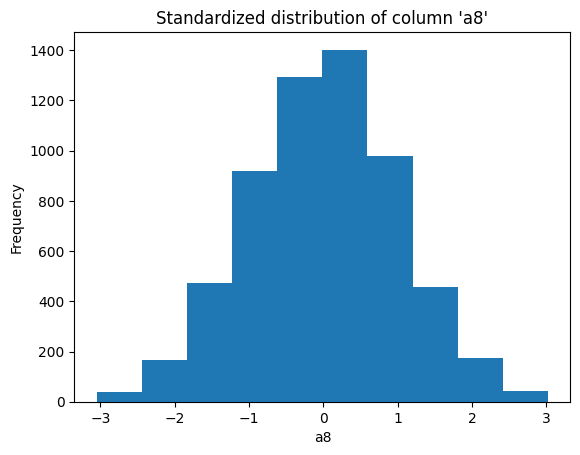

Statistics for column: a8
Mean: 9.262752232364637e-18
Median: 0.020185882329147684
Standard Deviation: 0.9999999899223695
Minimum Value: -3.0468868094755
Maximum Value: 3.0193636822866776

Before standardization:


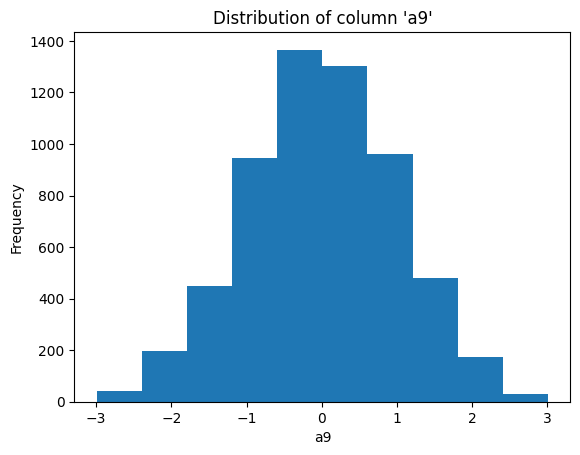

Statistics for column: a9
Mean: 0.0003710240145500974
Median: -0.0034861266305413
Standard Deviation: 0.9915629314342562
Minimum Value: -2.99024382203899
Maximum Value: 3.0076301135363

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


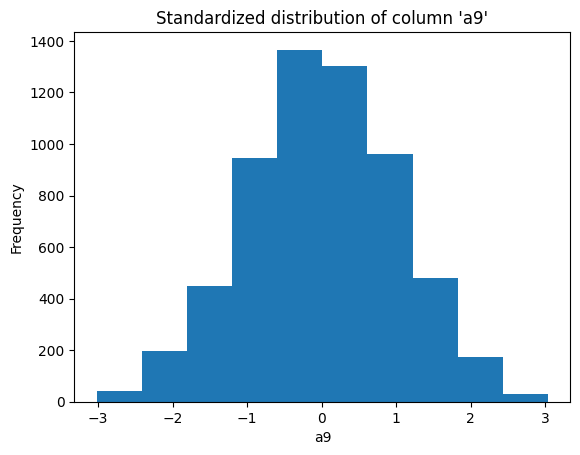

Statistics for column: a9
Mean: 5.975969182170733e-18
Median: -0.0038899705544785516
Standard Deviation: 0.9999999899149116
Minimum Value: -3.0160615338525414
Maximum Value: 3.0328474006621

Before standardization:


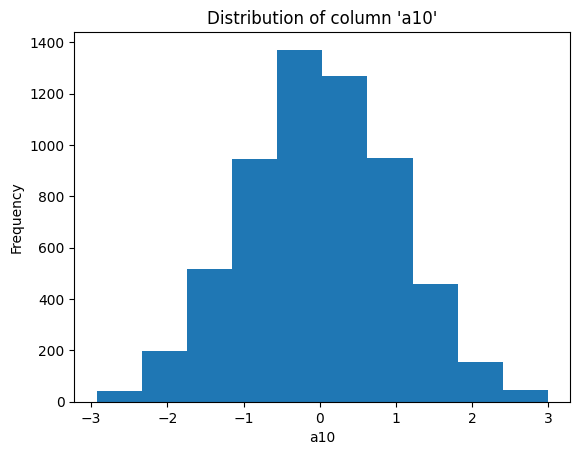

Statistics for column: a10
Mean: 0.001350119930847436
Median: -0.0092829035495256
Standard Deviation: 0.9898739399898596
Minimum Value: -2.92358230000578
Maximum Value: 2.99390209607894

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


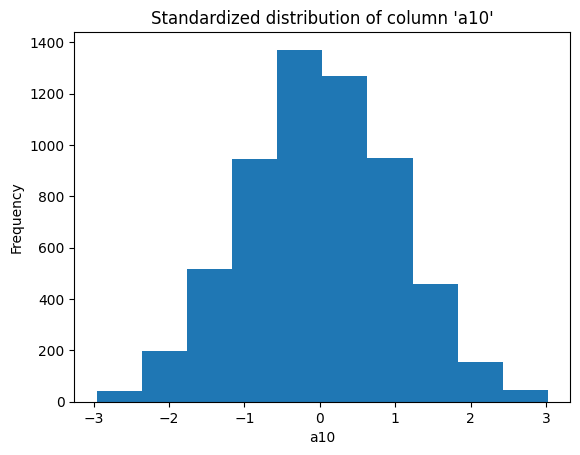

Statistics for column: a10
Mean: 2.9879845910853665e-18
Median: -0.010741795438178731
Standard Deviation: 0.9999999898977036
Minimum Value: -2.954853413373077
Maximum Value: 3.0231646930184883

Before standardization:


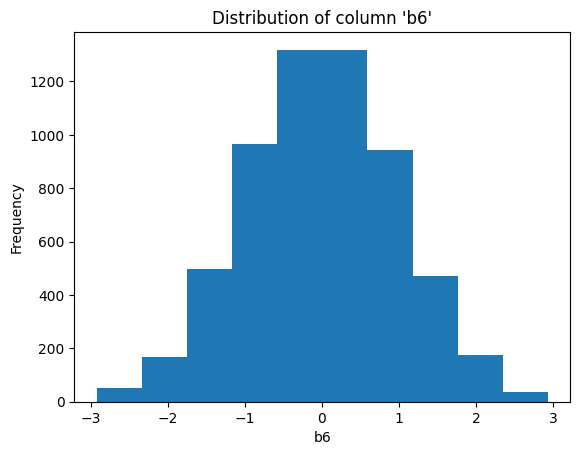

Statistics for column: b6
Mean: -0.007526083909334107
Median: -0.003377786152307
Standard Deviation: 0.9746648744747526
Minimum Value: -2.92234628963009
Maximum Value: 2.93292058090434

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


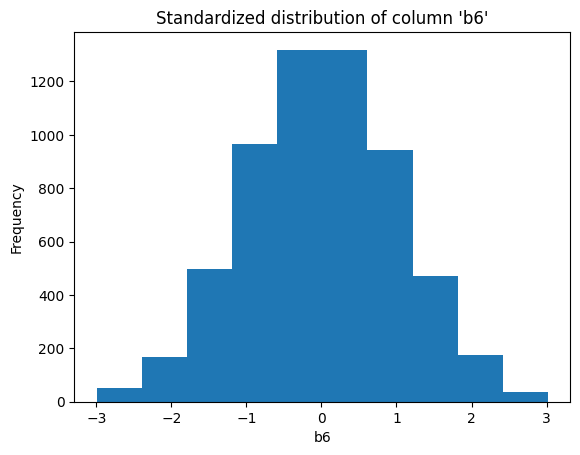

Statistics for column: b6
Mean: -1.972069830116342e-17
Median: 0.004256127232143617
Standard Deviation: 0.9999999897400633
Minimum Value: -2.9905870747478027
Maximum Value: 3.01687965951321

Before standardization:


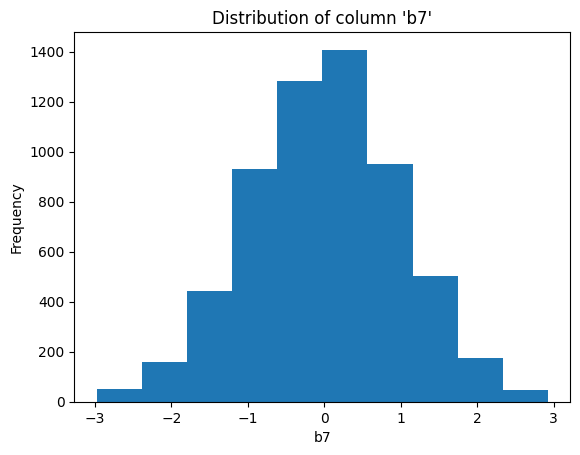

Statistics for column: b7
Mean: 0.002073052177773045
Median: 0.0229385794970571
Standard Deviation: 0.9764524194390792
Minimum Value: -2.97306560791935
Maximum Value: 2.9229663506603

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


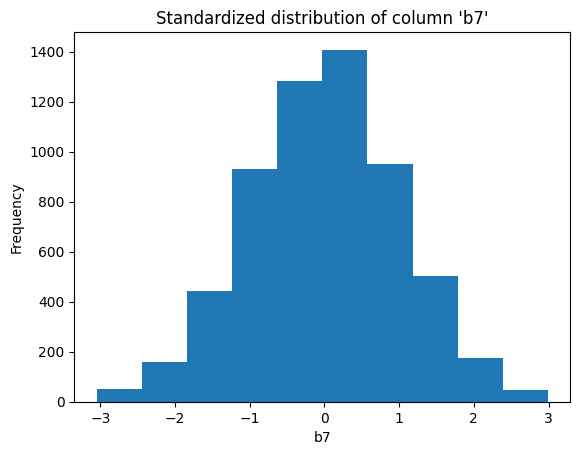

Statistics for column: b7
Mean: 1.0159147609690247e-17
Median: 0.02136870849025406
Standard Deviation: 0.9999999897588456
Minimum Value: -3.046885409262778
Maximum Value: 2.9913318974078718

Before standardization:


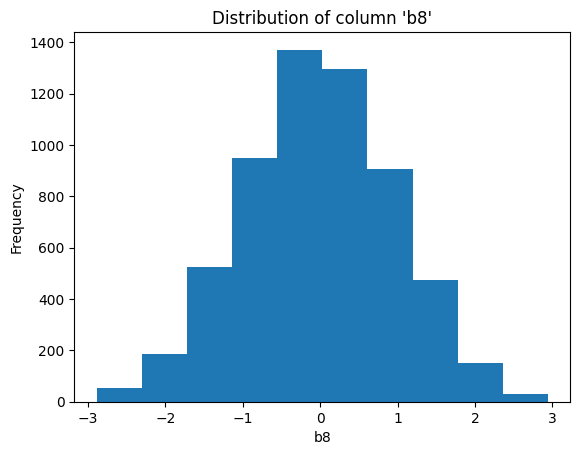

Statistics for column: b8
Mean: -0.016279650073020267
Median: -0.019604402801618
Standard Deviation: 0.9697485058151045
Minimum Value: -2.88498660348683
Maximum Value: 2.94275516480686

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


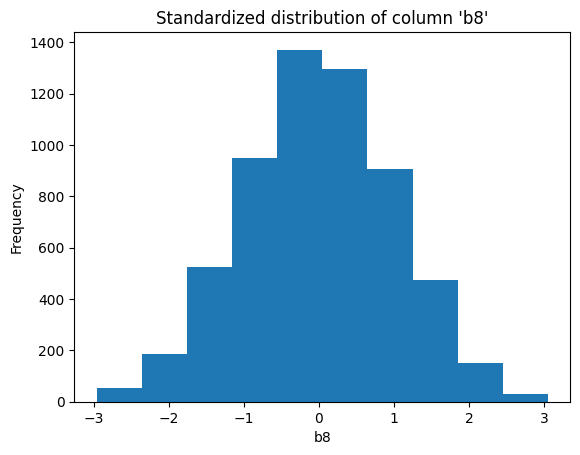

Statistics for column: b8
Mean: -1.254953528255854e-17
Median: -0.0034284690044647024
Standard Deviation: 0.9999999896880483
Minimum Value: -2.958196797035126
Maximum Value: 3.0513424528345032

Before standardization:


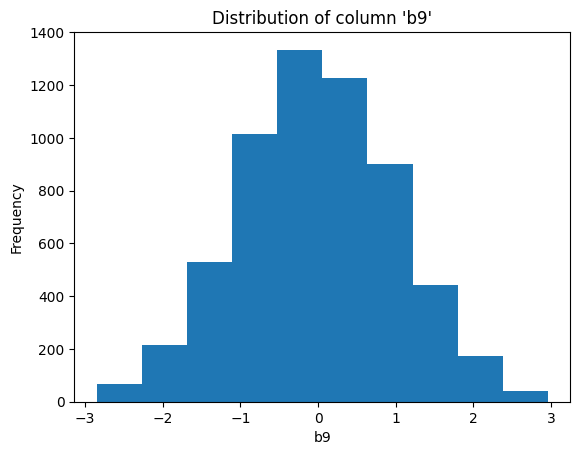

Statistics for column: b9
Mean: -0.012235071381656679
Median: -0.0281639589782756
Standard Deviation: 0.9924450874984742
Minimum Value: -2.84800018544562
Maximum Value: 2.96001607211455

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


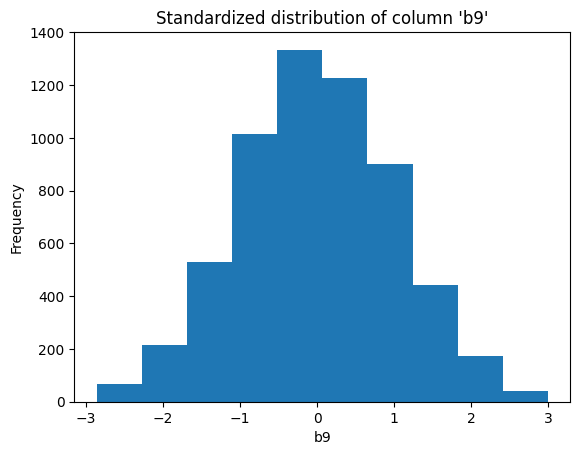

Statistics for column: b9
Mean: -2.509907056511708e-17
Median: -0.016050144876294692
Standard Deviation: 0.9999999899238758
Minimum Value: -2.8573521308248724
Maximum Value: 2.994877148356084

Before standardization:


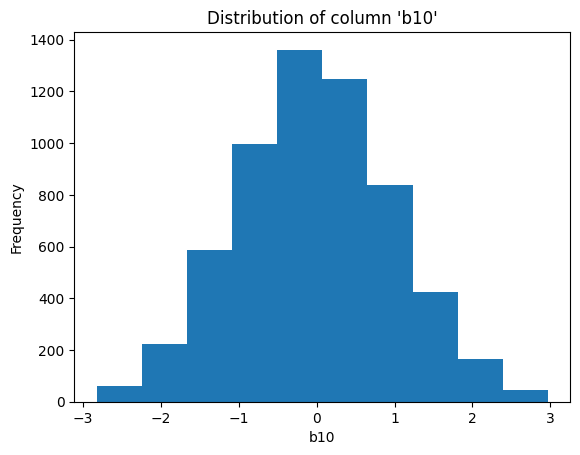

Statistics for column: b10
Mean: -0.01746610205905572
Median: -0.0331788504410843
Standard Deviation: 0.9876654694141705
Minimum Value: -2.81693563935045
Maximum Value: 2.96670744815784

After standardization:


C:\Users\wlyle\AppData\Local\Temp\ipykernel_34304\4102841876.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column] = (training_data[column] - mean) / (std + 1e-8)


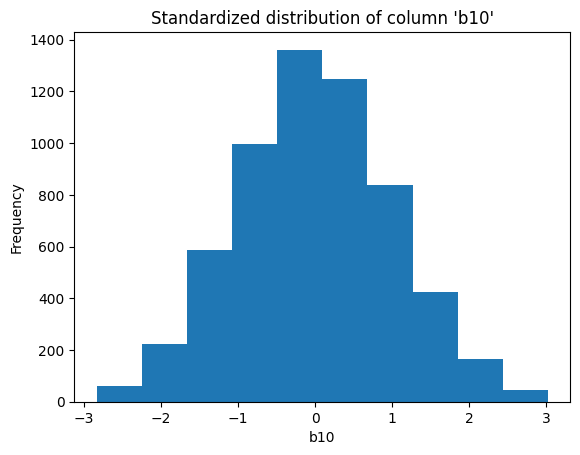

Statistics for column: b10
Mean: -1.1951938364341466e-17
Median: -0.015908977998652464
Standard Deviation: 0.9999999898751144
Minimum Value: -2.83443088337145
Maximum Value: 3.0214415836290494



In [21]:
for fold in range(NUM_FOLDS):
    training_data = kfold_data[fold]["train"]
    for column in numeric_columns:
        mean = training_data[column].mean()
        std = training_data[column].std()
        print("Before standardization:")
        plot_distribution(training_data[column], column, f"Distribution of column '{column}'")
        print_statistics(training_data[column], column)
        
        print("After standardization:")
        training_data[column] = (training_data[column] - mean) / (std + 1e-8)
        plot_distribution(training_data[column], column, f"Standardized distribution of column '{column}'")
        print_statistics(training_data[column], column)
    
    break # Temporary break to only show the first fold